In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_auc_score, roc_curve
from xgboost import XGBClassifier

In [5]:
train = pd.read_csv("training_set.csv")
test = pd.read_csv("test_set.csv")

train = train.drop(["Unnamed: 0"], axis = 1)
test = test.drop(["Unnamed: 0"], axis = 1)

print("Train Dataset Shape :", train.shape)
print("Test Dataset Shape :", test.shape)

Train Dataset Shape : (3910, 58)
Test Dataset Shape : (691, 57)


In [6]:
train.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X49,X50,X51,X52,X53,X54,X55,X56,X57,Y
0,0.00,0.00,4.34,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,1.342,0.000,0.000,1.200,2,12,0
1,0.00,0.56,0.56,0.00,1.12,0.56,2.25,0.00,0.0,0.56,...,0.0,0.083,0.0,0.503,0.000,0.083,16.304,148,375,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
3,0.64,0.00,0.64,0.00,1.93,0.00,0.00,0.00,0.0,0.00,...,0.0,0.000,0.0,0.462,0.370,0.000,2.440,22,122,1
4,0.58,0.00,0.00,35.46,0.58,0.00,0.58,0.58,0.0,0.00,...,0.0,0.000,0.0,0.239,0.239,0.000,3.338,123,207,1


In [7]:
test.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X48,X49,X50,X51,X52,X53,X54,X55,X56,X57
0,0.70,0.0,0.70,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.105,0.000,0.000,2.342,47,89
1,0.00,0.0,0.84,0.0,0.84,0.00,0.84,0.00,0.00,0.00,...,0.0,0.0,0.388,0.0,0.776,0.129,0.000,10.375,168,249
2,0.46,0.3,0.46,0.0,0.05,0.12,0.05,0.28,0.43,0.74,...,0.0,0.0,0.065,0.0,0.325,0.756,0.153,5.891,193,3040
3,0.10,0.2,1.01,0.0,0.80,0.80,0.50,0.00,0.80,0.10,...,0.0,0.0,0.110,0.0,0.490,0.158,0.015,8.550,669,1351
4,0.00,0.0,0.72,0.0,0.72,0.00,0.72,0.00,0.00,0.00,...,0.0,0.0,0.364,0.0,0.729,0.121,0.000,7.781,32,249


In [8]:
X_train, X_valid, y_train, y_valid  = train_test_split(train.drop(["Y"], axis = 1), train["Y"].values, test_size = 0.2, random_state = 15, stratify = train["Y"].values)
X_test = test.copy()

print("Train Dataset Shape :", X_train.shape)
print("Validation Dataset Shape :", X_valid.shape)
print("Test Dataset Shape :", X_test.shape)

print("\ny_train length :",len(y_train))
print("y_valid length :",len(y_valid))

Train Dataset Shape : (3128, 57)
Validation Dataset Shape : (782, 57)
Test Dataset Shape : (691, 57)

y_train length : 3128
y_valid length : 782


In [9]:
unimportant_features = ['X32', 'X34', 'X57', 'X56', 'X55', 'X54', 'X18', 'X28', 'X29', 'X15', 'X30', 'X31', 
                        'X33', 'X35','X38', 'X39', 'X40', 'X43', 'X6', 'X47', 'X51', 'X3', 'X2', 'X22', 'X20']

X_train = X_train.drop(unimportant_features, axis = 1)
X_valid = X_valid.drop(unimportant_features, axis = 1)
X_test = X_test.drop(unimportant_features, axis = 1)

scaler = MinMaxScaler()
scaler.fit(X_train.values)

X_train_normalize = scaler.transform(X_train.values)
X_valid_normalize = scaler.transform(X_valid.values)
X_test_normalize = scaler.transform(X_test.values)

In [10]:
xgb_classifier = XGBClassifier(n_estimators = 100, max_depth = 50, min_samples_split = 1, random_state = 15)
xgb_classifier.fit(X_train_normalize, y_train)
print("In XGBoost")
print("Train Accuracy :", xgb_classifier.score(X_train_normalize, y_train))
print("Validation Accuracy :", xgb_classifier.score(X_valid_normalize, y_valid))

print("\nTrain AUC Score :", roc_auc_score(y_train, xgb_classifier.predict(X_train_normalize)))
print("Validation AUC Score :", roc_auc_score(y_valid, xgb_classifier.predict(X_valid_normalize)))

[23:51:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:51:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
In XGBoost
Train Accuracy : 0.9968030690537084
Validation Accuracy : 0.9475703324808185

Train AUC Score : 0.996069498873968
Validation AUC Score : 0.9470495456883251


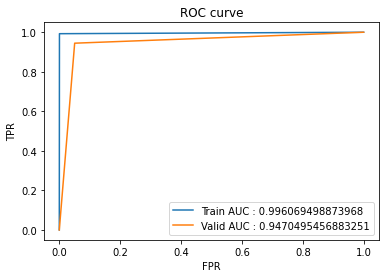

In [11]:
fpr_train, tpr_train, _ = roc_curve(y_train, xgb_classifier.predict(X_train_normalize))
fpr_valid, tpr_valid, _ = roc_curve(y_valid, xgb_classifier.predict(X_valid_normalize))

auc_train_score = roc_auc_score(y_train, xgb_classifier.predict(X_train_normalize))
auc_valid_score = roc_auc_score(y_valid, xgb_classifier.predict(X_valid_normalize))

fig, ax = plt.subplots()
ax.plot(fpr_train, tpr_train, label = 'Train AUC : {}'.format(auc_train_score))
ax.plot(fpr_valid, tpr_valid, label = 'Valid AUC : {}'.format(auc_valid_score))
ax.legend()

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.show()

In [12]:
xgb_classifier = XGBClassifier(n_estimators = 25, max_depth = 15, min_samples_split = 1, random_state = 15)
xgb_classifier.fit(X_train_normalize, y_train)
y_test_predict = xgb_classifier.predict(X_test_normalize)
y_test_predict

[23:51:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "min_samples_split" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:51:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,

In [13]:
submission = pd.DataFrame()
submission['Y_test_predict'] = y_test_predict
submission.to_csv("submission.csv", index=False)